# Manipulation de données avec pandas

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [3]:
ser_pop=Series([70,1200,8,250,40], index=["France","Chine",
                                          "Suisse", "USA", "Espagne"])

In [4]:
print(ser_pop[ser_pop>50].index)

Index(['France', 'Chine', 'USA'], dtype='object')


In [5]:
#on peut transformer cet objet en dictionnaire
dico_pop=ser_pop.to_dict()

In [6]:
dico_pop

{'Chine': 1200, 'Espagne': 40, 'France': 70, 'Suisse': 8, 'USA': 250}

In [7]:
"USA" in ser_pop

True

In [8]:
#ajout des titres
ser_pop.name="Populations"
ser_pop.index.name="Pays"

In [9]:
ser_pop

Pays
France       70
Chine      1200
Suisse        8
USA         250
Espagne      40
Name: Populations, dtype: int64

Créez un objet Series et ajoutez des dates partant du 3 octobre 2016 par jour jusqu’à aujourd’hui.


In [10]:
import datetime

In [11]:
mes_dates=pd.date_range("2016-10-3",datetime.date.today(),freq="D")

In [12]:
ser_action=Series(np.random.randn(len(mes_dates)),index=mes_dates)
ser_action2=Series(np.random.randn(len(mes_dates)),index=mes_dates)

In [13]:
ser_action.name="Mon action"
ser_action.index.name="Date"

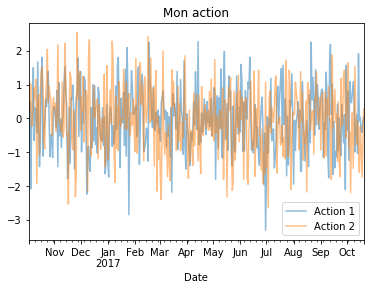

In [14]:
ser_action.plot(title="Mon action",alpha=0.5,label="Action 1")
ser_action2.plot(title="Mon action",alpha=0.5, label="Action 2")
plt.legend()

Créez un objet Series avec des résultats par trimestres à partir de 2012.


In [15]:
mes_trimestres=pd.period_range("2012-01-15",datetime.date.today(),freq="Q")

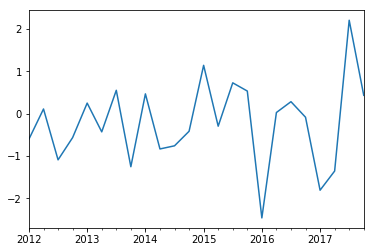

In [16]:
Series(np.random.randn(mes_trimestres.shape[0]),index=mes_trimestres).plot()

Construire un dictionnaire avec des produits et des prix puis afficher le DataFrame obtenu en transformant ce dictionnaire


In [17]:
dico_produits={"Produits":["PC","XBox","Sony","Mac"],"Prix":[100,80,120,150]}

In [18]:
frame_produits=DataFrame(dico_produits)

In [19]:
frame_produits

,Prix,Produits
0,100,PC
1,80,XBox
2,120,Sony
3,150,Mac


In [20]:
frame_produits["Prix"]

0    100
1     80
2    120
3    150
Name: Prix, dtype: int64

On va aller copier / coller des données sur le site de wikipedia

In [28]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [67]:
frame_nba=pd.read_clipboard()

In [69]:
frame_nba.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Pct.', 'First NBA Season',
       'Total Games', 'Division'],
      dtype='object')

In [70]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,067","1,247",0.624,1976–77,"3,314",Southwest
1,2,Los Angeles Lakers,"3,261","2,190",0.598,1948–49,"5,451",Pacific
2,3,Boston Celtics,"3,274","2,286",0.589,1946–47,"5,560",Atlantic
3,4,Phoenix Suns,"2,146","1,824",0.541,1968–69,"3,970",Pacific
4,5,Oklahoma City Thunder,"2,186","1,866",0.539,1967–68,"4,052",Northwest


In [78]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null float64
Lost                30 non-null float64
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null float64
Division            30 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


In [81]:
def nettoyage_frame(frame1):
    """Cette fonction transforme les variables ayant des séparateurs de milliers
    en float
    """
    for var in frame1.columns:
        if frame1[var].dtype == object:
            frame1[var]=frame1[var].str.replace(",","").astype(float,
                                                            errors="ignore")

In [82]:
nettoyage_frame(frame_nba)

In [88]:
#on affiche les équipes ayant gagnées plus de 2500 matchs
frame_nba[frame_nba["Won"]>2500]

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
1,2,Los Angeles Lakers,3261.0,2190.0,0.598,1948–49,5451.0,Pacific
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic
10,11,Philadelphia 76ers,2754.0,2632.0,0.511,1949–50,5386.0,Atlantic
13,14,Atlanta Hawks,2693.0,2695.0,0.500,1949–50,5388.0,Southeast
15,16,New York Knicks,2732.0,2825.0,0.492,1946–47,5557.0,Atlantic
16,17,Detroit Pistons,2653.0,2797.0,0.487,1948–49,5450.0,Central
19,20,Golden State Warriors,2657.0,2899.0,0.478,1946–47,5556.0,Pacific


In [94]:
#on peut le faire en query aussi (attention aux noms des variables avec espaces et caractères spéciaux)
frame_nba.query("Won>2500 and Lost<2500")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
1,2,Los Angeles Lakers,3261.0,2190.0,0.598,1948–49,5451.0,Pacific
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic


In [98]:
frame_nba.query("Division == 'Atlantic'")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic
10,11,Philadelphia 76ers,2754.0,2632.0,0.511,1949–50,5386.0,Atlantic
15,16,New York Knicks,2732.0,2825.0,0.492,1946–47,5557.0,Atlantic
24,25,Toronto Raptors,785.0,971.0,0.447,1995–96,1756.0,Atlantic
27,28,Brooklyn Nets,1380.0,1934.0,0.416,1976–77,3314.0,Atlantic


In [116]:
#on préfère cette ecriture
frame_nba[(frame_nba["Division"]=="Atlantic") & (frame_nba["Won"]>2500)]

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
2,3,Boston Celtics,3274.0,2286.0,0.589,1946–47,5560.0,Atlantic
10,11,Philadelphia 76ers,2754.0,2632.0,0.511,1949–50,5386.0,Atlantic
15,16,New York Knicks,2732.0,2825.0,0.492,1946–47,5557.0,Atlantic


In [107]:
#on peut faire un tri
frame_nba.sort_values(["Division","Won"],ascending=[True,False],inplace=True)

In [110]:
# on décrit toutes les variables
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
count,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30
unique,NaN,30,NaN,NaN,NaN,16,NaN,6
top,NaN,Brooklyn Nets,NaN,NaN,NaN,1976–77,NaN,Central
freq,NaN,1,NaN,NaN,NaN,4,NaN,5
mean,15.500000,NaN,1893.966667,1884.833333,0.494300,NaN,3778.800000,NaN
std,8.803408,NaN,738.329311,632.328051,0.055334,NaN,1309.153541,NaN
min,1.000000,NaN,562.000000,652.000000,0.391000,NaN,1214.000000,NaN
25%,8.250000,NaN,1413.750000,1395.250000,0.459250,NaN,3067.750000,NaN
50%,15.500000,NaN,2028.500000,1900.000000,0.494500,NaN,3806.000000,NaN
75%,22.750000,NaN,2418.500000,2286.000000,0.521500,NaN,5172.750000,NaN


In [111]:
#on calcule la corrélation
frame_nba.corr()

,Rank,Won,Lost,Pct.,Total Games
Rank,1.000000,-0.586385,-0.082124,-0.967006,-0.370373
Won,-0.586385,1.000000,0.823484,0.600994,0.961722
Lost,-0.082124,0.823484,1.000000,0.072293,0.947429
Pct.,-0.967006,0.600994,0.072293,1.000000,0.373863
Total Games,-0.370373,0.961722,0.947429,0.373863,1.000000


#### Importation de données CSV

In [22]:
frame_ventes=pd.read_csv("demo_ventes.csv",sep=";",decimal=".")

In [24]:
frame_ventes.head()

,account,Jan,Feb,Mar
0,211829,10000,62000,35000
1,320563,95000,45000,35000
2,648336,91000,120000,35000
3,109996,45000,120000,10000
4,121213,162000,120000,35000


In [25]:
#récupérer tableau html
bank=pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [26]:
frame_bank=bank[0]

In [29]:
#on peut récupérer aussi les données précédente NBA
nba=pd.read_html(url,header="infer")

In [30]:
len(nba)

7

In [31]:
nba[1].head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,2067,1247,0.624,1976–77,3314,Southwest
1,2,Los Angeles Lakers,3261,2190,0.598,1948–49,5451,Pacific
2,3,Boston Celtics,3274,2286,0.589,1946–47,5560,Atlantic
3,4,Phoenix Suns,2146,1824,0.541,1968–69,3970,Pacific
4,5,Oklahoma City Thunder,2186,1866,0.539,1967–68,4052,Northwest


Importez un fichier Excel depuis python. On utilisera excel-data.xlsx


In [32]:
#approche classique
frame_excel1=pd.read_excel("excel-data.xlsx")

In [33]:
#approche avec classe ExcelFile
excel1=pd.ExcelFile("excel-data.xlsx")

In [34]:
excel1.sheet_names

['sheet1']

In [35]:
frame_excel2=excel1.parse(excel1.sheet_names[0])

### Import de données SQL

In [36]:
#SQL
from sqlalchemy import create_engine

In [38]:
con=create_engine("sqlite:///database.sqlite")

In [39]:
con.table_names()

['Aliases', 'EmailReceivers', 'Emails', 'Persons']

In [40]:
frame_emails=pd.read_sql_query("select * from Emails",con=con)

In [42]:
con2=create_engine("sqlite:///salaries.sqlite")
frame_salaries=pd.read_sql_query("select * from Salaries",con=con2)

In [43]:
frame_salaries.shape

(148654, 13)

In [46]:
#on extrait l'employé le moins bien payé et la moyenne des salaires
print(frame_salaries.iloc[frame_salaries["TotalPay"].idxmin()])
print(frame_salaries["TotalPay"].mean())

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                         
Agency                           San Francisco
Status                                      PT
Name: 148653, dtype: object
74768.321971703


### Les jointures

In [47]:
frame_global=pd.merge(frame_excel1,frame_ventes,on="account")

In [48]:
frame_global

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


Créez une variable dans le dataframe des ventes pour obtenir des niveaux de ventes.


In [49]:
frame_airbnb=pd.read_csv("airbnb.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
#on nettoie les données
frame_airbnb["price2"]=\
        frame_airbnb["price"].str.replace("$","").\
        str.replace(",","")\
        .astype(float)

In [51]:
#on discrétise une variable
frame_airbnb["price_disc"]=pd.cut(frame_airbnb["price2"],5)

In [52]:
frame_airbnb["price_disc"].value_counts()

(-7.79, 1558.0]     56516
(1558.0, 3116.0]       15
(4674.0, 6232.0]        3
(6232.0, 7790.0]        1
(3116.0, 4674.0]        0
Name: price_disc, dtype: int64

In [53]:
frame_airbnb["price_disc2"]=pd.qcut(frame_airbnb["price2"],5)

In [54]:
frame_airbnb["price_disc2"].value_counts()

(-0.001, 50.0]     13197
(65.0, 85.0]       11585
(85.0, 120.0]      11354
(120.0, 7790.0]    10699
(50.0, 65.0]        9700
Name: price_disc2, dtype: int64

In [55]:
frame_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56535 entries, 0 to 56534
Data columns (total 98 columns):
id                                  56535 non-null int64
listing_url                         56535 non-null object
scrape_id                           56535 non-null int64
last_scraped                        56535 non-null object
name                                56532 non-null object
summary                             54371 non-null object
space                               39143 non-null object
description                         56528 non-null object
experiences_offered                 56535 non-null object
neighborhood_overview               33772 non-null object
notes                               18012 non-null object
transit                             36224 non-null object
access                              28756 non-null object
interaction                         27064 non-null object
house_rules                         30186 non-null object
thumbnail_url          

In [223]:
group_cancel=frame_airbnb.groupby("cancellation_policy")

In [228]:
group_cancel.mean()["price2"]

cancellation_policy
flexible             82.419939
moderate             86.645159
strict              117.342344
super_strict_30     268.285714
super_strict_60    1862.454545
Name: price2, dtype: float64

In [56]:
frame_airbnb["price_max"]=np.where(frame_airbnb["price2"]>300,300,frame_airbnb["price2"])

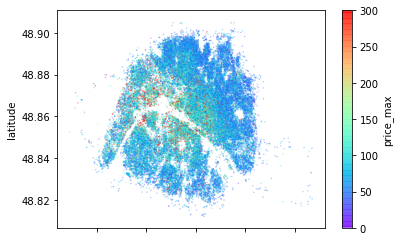

In [57]:
frame_airbnb.plot("longitude","latitude",kind="scatter",s=0.1,
                 c="price_max",colormap=plt.get_cmap("rainbow"),alpha=0.6)

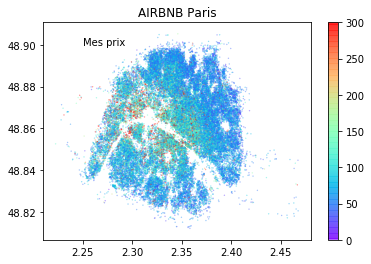

In [58]:
plt.scatter("longitude","latitude",data=frame_airbnb,s=0.1,
                 c="price_max",cmap=plt.get_cmap("rainbow"),alpha=0.6)
plt.colorbar()
plt.title("AIRBNB Paris")
plt.annotate("Mes prix",(2.25,48.9))

(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.70000000e+01,   1.50000000e+01,   4.30000000e+01,
          1.71000000e+02,   1.13000000e+02,   3.50000000e+02,
          3.29000000e+02,   9.65000000e+02,   1.33000000e+03,
          6.45000000e+02,   2.24700000e+03,   7.19000000e+02,
          2.11500000e+03,   4.13600000e+03,   5.51000000e+02,
          2.20200000e+03,   1.13900000e+03,   3.47900000e+03,
          2.32900000e+03,   5.60000000e+02,   3.62700000e+03,
          4.35000000e+02,   2.00000000e+03,   3.40400000e+03,
          2.63000000e+02,   1.36500000e+03,   6.81000000e+02,
          2.24600000e+03,   1.25000000e+03,   3.37000000e+02,
          2.92800000e+03,   1.18000000e+02,   3.32000000e+02,
          1.33200000e+03,   7.60000000e+01,   3.78000000e+02,
          2.30000000e+02,   1.42500000e+03,   4.08000000e+02,
          9.50000000e+01,   1.00200000e+03,   6.30000000e+01,
          2.82000000e+02,   7.45000000e+02,   7.00000000e+01,
        

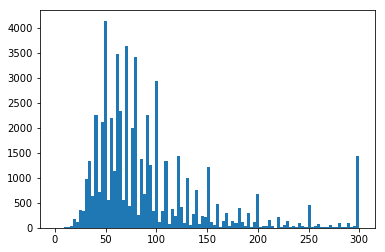

In [59]:
plt.hist("price_max",data=frame_airbnb,bins=100)
